<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
dataset_len = 180
dlen = int(dataset_len/2)
X_11 = pd.Series(np.random.normal(100,2,dlen))
X_12 = pd.Series(np.random.normal(90,2,dlen))
X_1 = pd.concat([X_11, X_12]).reset_index(drop=True)
X_21 = pd.Series(np.random.normal(10,3,dlen))
X_22 = pd.Series(np.random.normal(7,3,dlen))
X_2 = pd.concat([X_21, X_22]).reset_index(drop=True)
X_31 = pd.Series(np.random.normal(22,7,dlen))
X_32 = pd.Series(np.random.normal(52,5,dlen))
X_3 = pd.concat([X_31, X_32]).reset_index(drop=True)

Y_1 = pd.Series(np.random.normal(40,3,dlen))
Y_2 = pd.Series(np.random.normal(82,7,dlen))
Y = pd.concat([Y_1, Y_2]).reset_index(drop=True)
#Y = pd.Series(np.repeat([0,1],dlen))
df = pd.concat([X_1, X_2, X_3, Y], axis=1)
df.columns = ['Advertisement Spent', 'Brand Equity Score', 'Market Share', 'Sales']
df.head()

,Advertisement Spent,Brand Equity Score,Market Share,Sales
0,99.214862,11.289363,21.957376,37.933788
1,98.189282,15.262342,18.378131,37.506775
2,99.522868,7.431480,24.263226,44.467174
3,98.109838,7.012042,18.211384,36.649235
4,103.485995,6.682328,21.909969,42.840554


In [332]:
np.mean(X_3)

37.02633005225495

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(['Sales'], axis = 1).values
Y = df['Sales']

X = StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

In [65]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X_Train, Y_Train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [316]:
X_Test

array([[ 4.79189032e-01,  4.72114269e-01, -8.64495729e-01],
       [ 2.11285189e-01,  2.66155874e-01, -1.08978639e+00],
       [-4.95258562e-01, -1.05041253e+00,  8.82171181e-01],
       [ 1.50144706e+00, -4.44361279e-01, -4.29636545e-01],
       [-1.63599544e+00,  4.05648733e-01,  8.28080859e-01],
       [ 1.17201269e+00,  1.07094274e+00, -2.66776613e-01],
       [-1.47650570e+00, -1.68935360e+00,  7.89523387e-01],
       [ 4.48897939e-01,  3.82981860e-01, -1.54779959e+00],
       [-1.18692373e+00, -4.58637455e-01,  7.64202645e-01],
       [-1.32232031e+00,  4.27234680e-02,  1.07538191e+00],
       [ 8.39905345e-01,  8.25876429e-01, -1.04370356e+00],
       [ 8.75486138e-01,  5.08948267e-01, -1.17383738e+00],
       [ 9.21643338e-01,  1.05329437e+00, -3.94225059e-01],
       [-5.37549455e-04,  6.93052430e-01, -4.54965384e-02],
       [ 9.64243866e-01,  3.27675303e-01, -1.02166428e+00],
       [ 9.33217956e-01, -2.92468996e-01, -1.23091148e+00],
       [-1.14539863e+00, -8.53157265e-01

In [66]:
pred = regr.predict(X_Test)
pred

array([39.36914966, 50.72737544, 82.75985909, 39.80243805, 85.74211755,
       39.36099811, 82.84099606, 39.26024527, 83.46169473, 84.66594474,
       39.64313082, 39.8831731 , 39.49364007, 55.00131122, 39.92337466,
       40.05374316, 82.87874322, 84.46120034, 40.50957328, 39.55788208,
       84.92073107, 83.04263449, 85.042146  , 85.07850683, 39.92913785,
       39.18326541, 84.49998474, 84.19245876, 84.95850386, 82.33801999,
       82.91055814, 85.25309125, 39.40035192, 39.60388005, 39.70089272,
       39.31910687, 38.99331161, 80.87339966, 85.92943433, 83.53254088,
       83.54507635, 39.67850389, 38.95293821, 39.38460576, 66.86953876,
       84.83615537, 38.88288383, 83.68608429, 81.53647138, 84.77271054,
       39.85828194, 85.10585108, 40.72867095, 39.96865184])

In [68]:
regr.score(X_Test, Y_Test)

0.9152041340033736

In [250]:
str(np.mean(X_Test[:, 0]))

'-0.04413702625956062'

In [73]:
str(np.mean(pred))

'61.96120317160239'

C:\Users\hp\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


Text(300, 170, 'Sales')

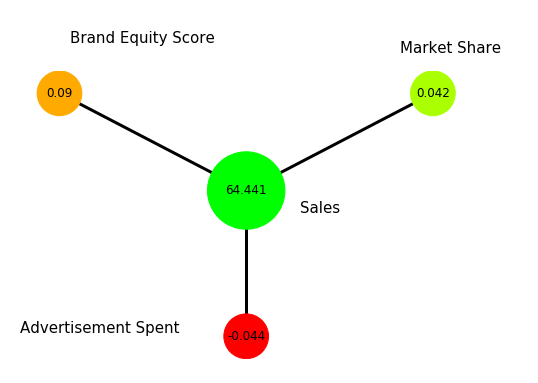

In [331]:
# libraries
pred = regr.predict(np.array([[300, 50, 6]]))


import pandas as pd
import numpy as np
import networkx as nx
from matplotlib.colors import LinearSegmentedColormap
 
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':[str(round(np.mean(X_Test[:, 0]),3)), str(round(np.mean(X_Test[:, 1]),3)), 
                            str(round(np.mean(X_Test[:, 2]),3))], 
                   'to':[str(round(np.mean(pred),3)), str(round(np.mean(pred),3)), str(round(np.mean(pred),3))]})
 
# And a data frame with characteristics for your nodes
carac = pd.DataFrame({ 'ID':[str(round(np.mean(X_Test[:, 0]),3)), str(round(np.mean(X_Test[:, 1]),3)), 
                            str(round(np.mean(X_Test[:, 2]),3)),
                             str(round(np.mean(pred),3))], 
                      'values':['group1','group2','group3','group4'] })
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph())
 
# The order of the node for networkX is the following order:
G.nodes()
# Thus, we cannot give directly the 'myvalue' column to netowrkX, we need to arrange the order!
 
# Here is the tricky part: I need to reorder carac to assign the good color to each node
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())
 
# And I need to transform my categorical column in a numerical value: group1->1, group2->2...
carac['values']=pd.Categorical(carac['values'])
carac['values'].cat.codes
 
d = dict(G.degree)

cdict = {'red':   ((0.0, 1.0, 1.0),
                   (0.5, 1.0, 1.0),
                   (1.0, 0.0, 0.0)),

         'green':  ((0.0, 0.0, 0.0),
                   (0.5, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'blue': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }

colours = LinearSegmentedColormap('GYR', cdict)
fixed_positions = {str(round(np.mean(X_Test[:, 0]),3)) :(0,0),
                   str(round(np.mean(X_Test[:, 1]),3)) :(-1,2),
                   str(round(np.mean(X_Test[:, 2]),3)) :(1,2),
                   str(round(np.mean(pred),3)) :(0, 1.2)}#dict with two of the positions set
fixed_nodes = fixed_positions.keys()
pos = nx.spring_layout(G,pos=fixed_positions, fixed = fixed_nodes)
    
# Custom the nodes:
nx.draw(G, with_labels=True, node_color=carac['values'].cat.codes, cmap= colours, pos=pos,
        node_size=[v * 2000 for v in d.values()], width=3)

plt.annotate('Brand Equity Score', xy=(70, 340), xycoords='figure pixels', fontsize= 15)
plt.annotate('Advertisement Spent', xy=(20, 50), xycoords='figure pixels', fontsize= 15)
plt.annotate('Market Share', xy=(400, 330), xycoords='figure pixels', fontsize= 15)
plt.annotate('Sales', xy=(300, 170), xycoords='figure pixels', fontsize= 15)